In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(1, '/home/preuer/OneDrive/Studium/Master/Semester/Sem_4/Master Thesis/Experiments/tools') # so i can import tools
from  gen_synth_data import *
from sklearn.linear_model import LogisticRegression


In [13]:
def ax_plot(ax):
    ax.plot(np.random.rand(10))
    ax.set_title('Random plot')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

In [14]:
X, Y, Y_se = generate_synthetic_data(False, 1000, disc_factor=np.pi/4)

In [22]:
X.shape, Y.shape, Y_se.shape

((2000, 2), (2000,), (2000,))

In [40]:
p_reg = LogisticRegression()
p_reg.fit(X, Y)
# Create a mesh grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for each point on the grid
Y_pred_p = p_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Y_pred_p = Y_pred_p.reshape(xx.shape)


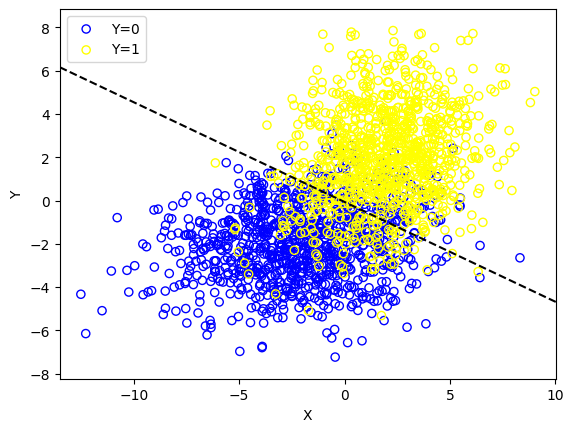

In [43]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, Y_pred_p, levels=[0.5], linestyles='--', colors='black')
plt.scatter(X[Y==-1][:,0], X[Y==-1][:,1], color='blue', s=35,  marker='o', facecolors='none', label='Y=0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color='yellow', s=35,  marker='o', facecolors='none', label='Y=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [3]:

array1 = np.array([1, 1, -1, 1, 1, -1, 1, -1, 1, -1])
np.random.seed(1)  # Set seed for reproducibility
flip_prob = 0.2  # Probability of flipping each value
mask = np.random.rand(array1.shape[0]) < flip_prob

mask_b = np.random.rand(array1.shape[0]) < flip_prob
print(mask, mask_b)

[False False  True False  True  True  True False False False] [False False False False  True False False False  True  True]


In [87]:
array1_flipped = np.where(mask, -array1, array1)
array1_flipped

array([ 1,  1,  1,  1, -1,  1, -1, -1,  1, -1])